In [25]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy as sp
import pandas as pd
from pandas.io.json import json_normalize
import json
import datetime
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tslearn.clustering import KShape
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler

In [3]:
def convert_datetime(name):
    json = pd.read_json('data/downloads/' + name + '_download.json')
    df_json = pd.DataFrame(json['downloads'])
    df = json_normalize(df_json['downloads'])
    df['day'] = pd.to_datetime(df['day'], infer_datetime_format=True)
    df.index = df['day']
    return df

def convert_week_datetime(name):
    df = convert_datetime(name)
    df_w = round(df.resample(rule="W").mean())
    return df_w

def convert_ts(name):
    df_w = convert_week_datetime(name)
    ts = sm.tsa.seasonal_decompose(df_w['downloads'].values, freq=52)
    return ts

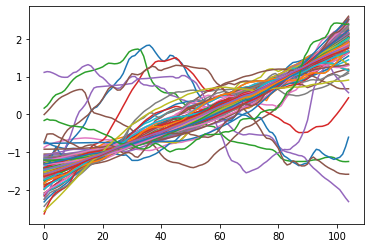

In [23]:
assets = pd.read_json('data/assets/over1000packages.json')
for i in assets.values:
    ts = convert_ts(i[0])
    ts = ts.trend[26:131]
    d = TimeSeriesScalerMeanVariance(mu=0. , std=1.).fit_transform(ts)
    plt.plot(d[0])

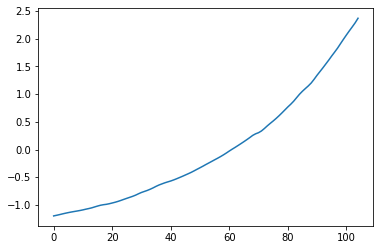

In [22]:
plt.plot(d[0])

In [68]:
assets = pd.read_json('data/assets/over1000packages.json')

X_train = np.empty([105, 1])


# km = TimeSeriesKMeans(n_clusters=3, verbose=True, random_state=0)
# y_pred = km.fit_predict(X_train)


# plt.figure()
# for yi in range(3):
#     plt.subplot(3, 3, yi + 1)
#     for xx in X_train[y_pred == yi]:
#         plt.plot(xx.ravel(), "k-", alpha=.2)
#     plt.plot(km.cluster_centers_[yi].ravel(), "r-")
#     plt.xlim(0, sz)
#     plt.ylim(-4, 4)
#     if yi == 1:
#         plt.title("Euclidean $k$-means")

# plt.tight_layout()
# plt.show()

x-train (105, 106)


In [ ]:
for i, v in enumerate(assets.values):
    ts = convert_ts(v[0])
    ts = ts.trend[26:131]
    d = TimeSeriesScalerMeanVariance(mu=0. , std=1.).fit_transform(ts)
    X_train = np.hstack([X_train, d[0]])

print('x-train', X_train.shape)
